In [2]:
import pandas as pd


movie_data_one_hot = pd.read_csv('updated_movie_dataset.csv')

# correlation analysis
correlation_with_metascore_updated = movie_data_one_hot.iloc[:, movie_data_one_hot.columns.get_loc('metascore')+1:].corrwith(movie_data_one_hot['metascore'])

# Sorting
sorted_correlations = correlation_with_metascore_updated.sort_values(ascending=False)

print(sorted_correlations)


Drama                    0.314143
percent dialogue         0.191028
Biography                0.147780
characters               0.126310
Joy                      0.125665
Trust                    0.114626
Positive                 0.113313
Anticipation             0.112166
Surprise                 0.047788
Romance                  0.018733
Top 3                    0.011380
Crime                    0.008593
Sadness                  0.007019
Paramount Pictures      -0.001161
Comedy                  -0.006716
Mystery                 -0.008505
scenes                  -0.016030
Universal Pictures      -0.023283
locations               -0.024758
Negative                -0.032480
Twentieth Century Fox   -0.036446
Disgust                 -0.041800
Columbia Pictures       -0.045941
Warner Bros.            -0.048657
Anger                   -0.050538
Adventure               -0.071346
Sci-Fi                  -0.085428
New Line Cinema         -0.085549
Fear                    -0.090110
Fantasy       

C:\Users\jlemo\AppData\Local\Temp\ipykernel_12508\1247530498.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='tab10')


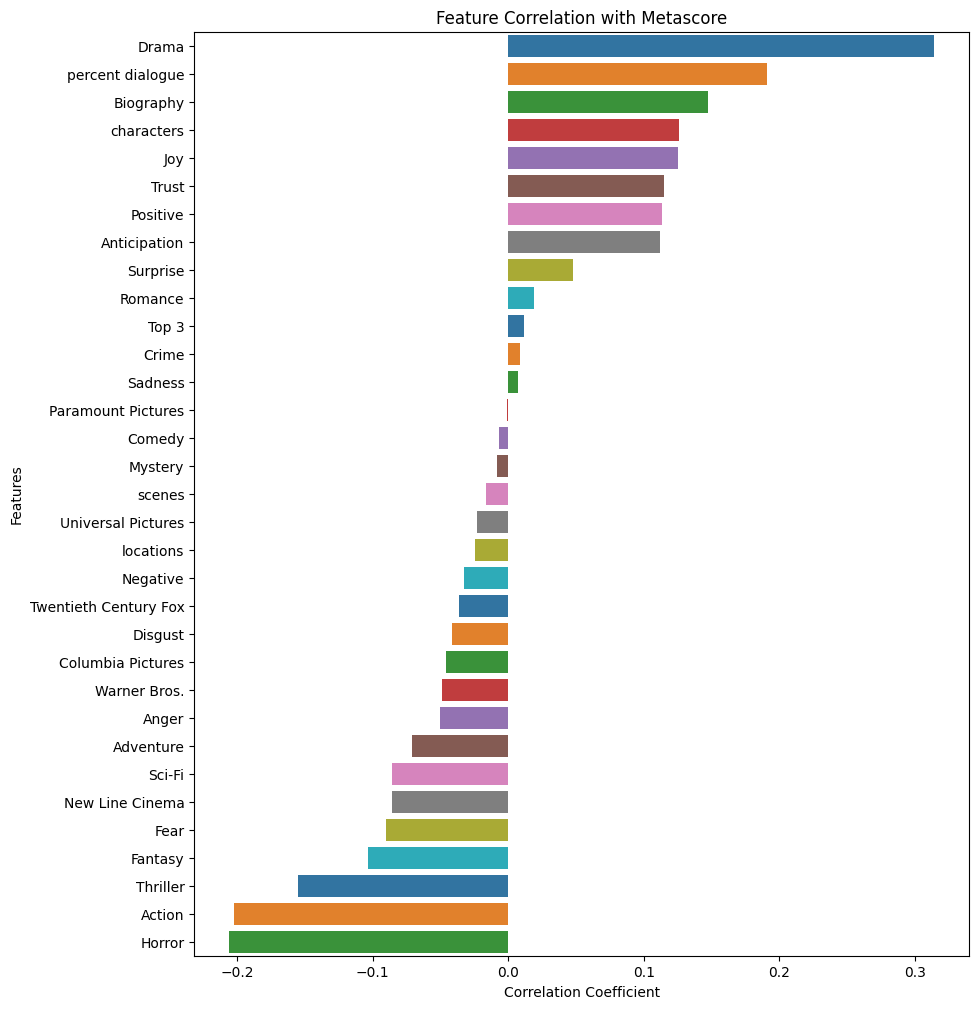

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 12))
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index, palette='tab10')
plt.title('Feature Correlation with Metascore')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()


In [4]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

file_path = 'updated_movie_dataset.csv'
movie_data = pd.read_csv(file_path)

movie_data = movie_data.iloc[:, 3:]

if 'metascore' not in movie_data.columns:
    raise ValueError("The 'metascore' column is not included in the dataset.")

X = movie_data.drop('metascore', axis=1) 
y = movie_data['metascore']               

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# mutual information analysis
mi = mutual_info_regression(X_scaled, y)

mi_results = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})

# Sorting
mi_results.sort_values(by='Mutual Information', ascending=False, inplace=True)

print(mi_results)



                  Feature  Mutual Information
20                  Drama            0.064098
2        percent dialogue            0.051081
22                 Horror            0.039542
17              Biography            0.035340
11                    Joy            0.033688
8                Negative            0.030628
21                Fantasy            0.027391
15                 Action            0.025009
10           Anticipation            0.019008
13                  Trust            0.017686
7                    Fear            0.016770
14                  Top 3            0.010939
25                 Sci-Fi            0.008666
4                Positive            0.007136
23                Mystery            0.006265
12               Surprise            0.004636
24                Romance            0.004170
31  Twentieth Century Fox            0.000101
27           Warner Bros.            0.000000
26               Thriller            0.000000
28     Universal Pictures         

C:\Users\jlemo\AppData\Local\Temp\ipykernel_12508\3122800797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mutual Information', y='Feature', data=mi_results, palette='tab10')


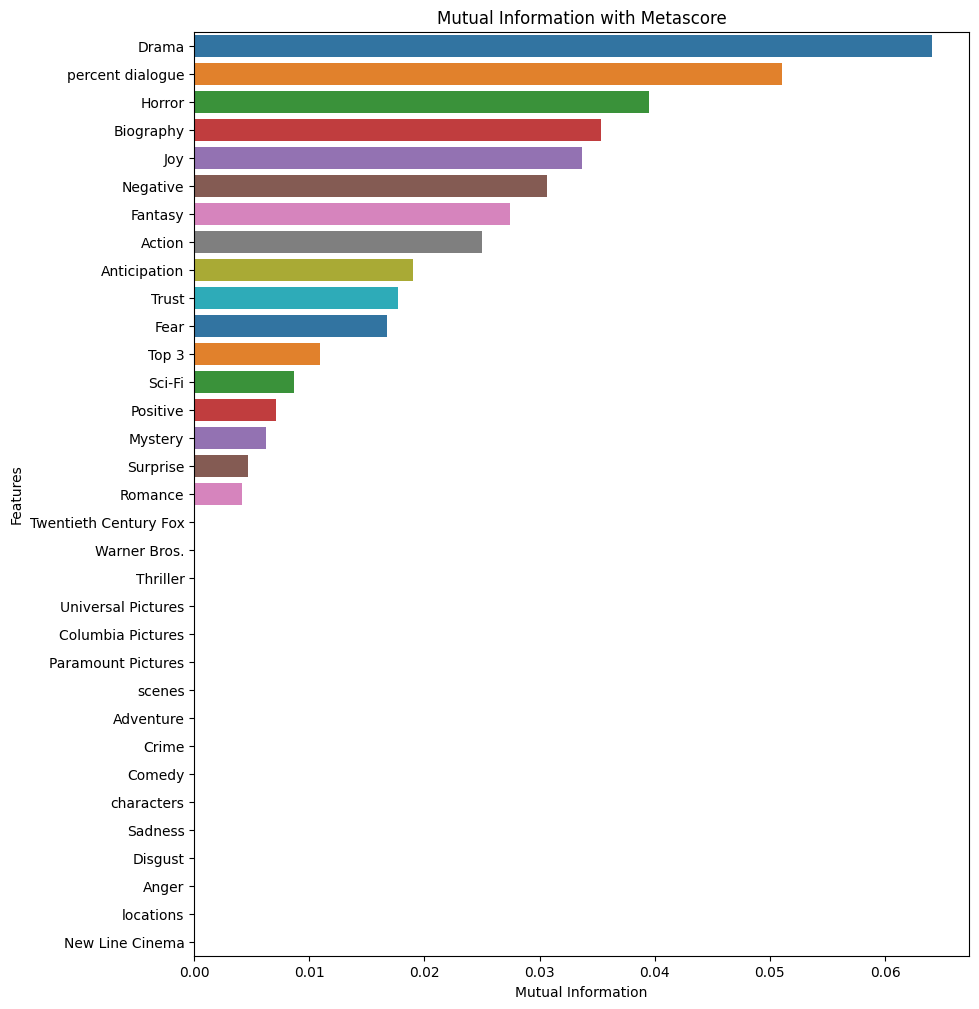

In [5]:
plt.figure(figsize=(10, 12))
sns.barplot(x='Mutual Information', y='Feature', data=mi_results, palette='tab10')
plt.title('Mutual Information with Metascore')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()

In [6]:
import pandas as pd
from sklearn.feature_selection import f_regression

file_path = 'updated_movie_dataset.csv'
movie_data = pd.read_csv(file_path)

movie_data = movie_data.iloc[:, 3:]

if 'metascore' not in movie_data.columns:
    raise ValueError("The 'metascore' column is not included in the dataset.")

X = movie_data.drop('metascore', axis=1)  
y = movie_data['metascore']              

# Compute F-statistic and p-values
f_scores, p_values = f_regression(X, y)

f_results = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})

# Sort by F score
f_results.sort_values(by='F-Score', ascending=False, inplace=True)

print(f_results)



                  Feature     F-Score       p-value
20                  Drama  164.346120  8.882288e-36
22                 Horror   66.342214  7.894241e-16
15                 Action   64.073880  2.378975e-15
2        percent dialogue   56.848302  8.106502e-14
26               Thriller   36.836725  1.623710e-09
17              Biography   33.512174  8.608654e-09
1              characters   24.335536  8.993722e-07
11                    Joy   24.083626  1.022916e-06
13                  Trust   19.984397  8.394147e-06
4                Positive   19.523149  1.065179e-05
10           Anticipation   19.125005  1.308647e-05
21                Fantasy   16.212816  5.943669e-05
7                    Fear   12.287673  4.693711e-04
32        New Line Cinema   11.066308  9.003474e-04
25                 Sci-Fi   11.034671  9.157278e-04
16              Adventure    7.679537  5.653968e-03
5                   Anger    3.843539  5.012274e-02
27           Warner Bros.    3.562021  5.930850e-02
12          

C:\Users\jlemo\AppData\Local\Temp\ipykernel_12508\3215629885.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='F-Score', y='Feature', data=f_results, palette='tab10')


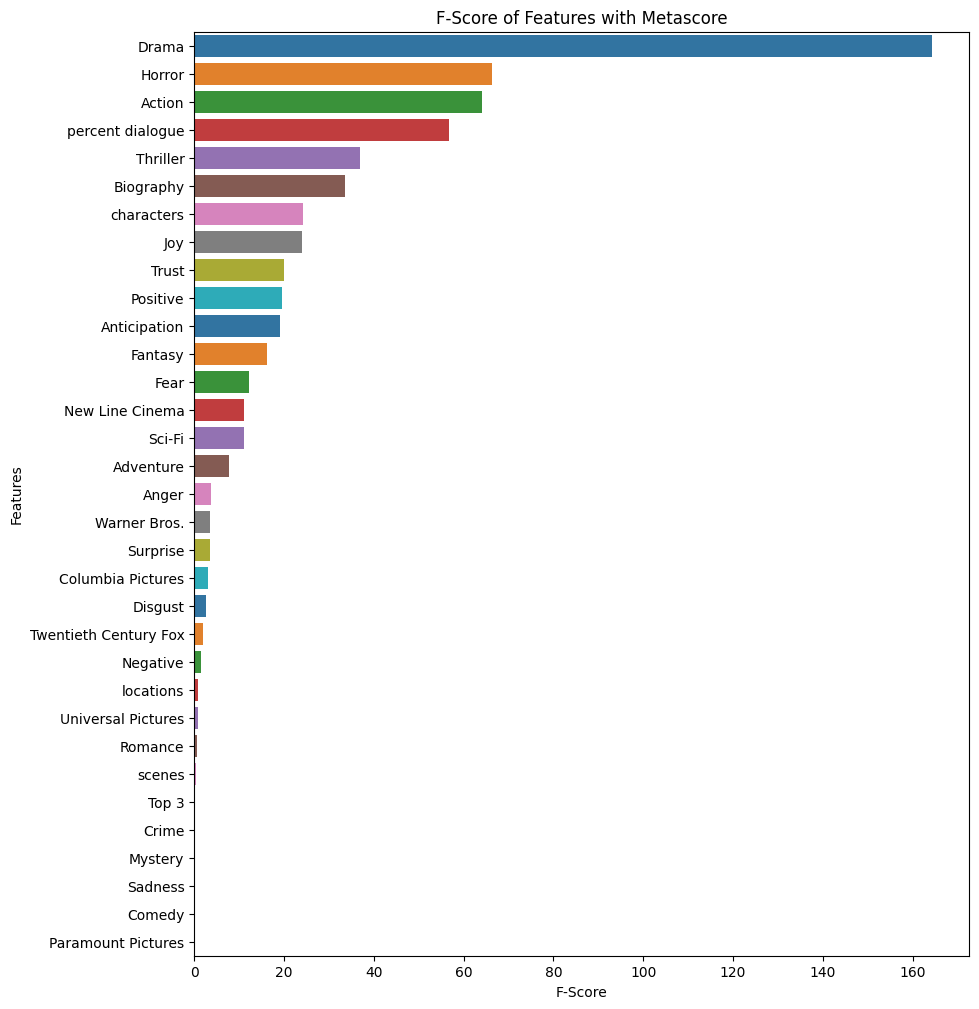

In [7]:
plt.figure(figsize=(10, 12))
sns.barplot(x='F-Score', y='Feature', data=f_results, palette='tab10')
plt.title('F-Score of Features with Metascore')
plt.xlabel('F-Score')
plt.ylabel('Features')
plt.show()

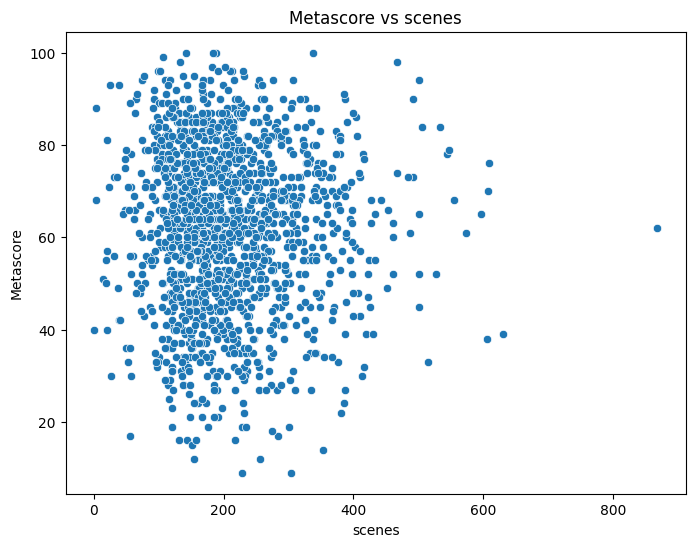

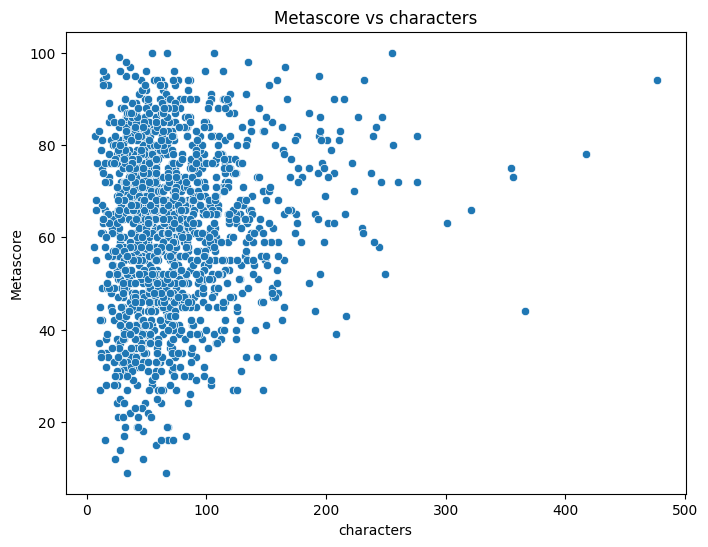

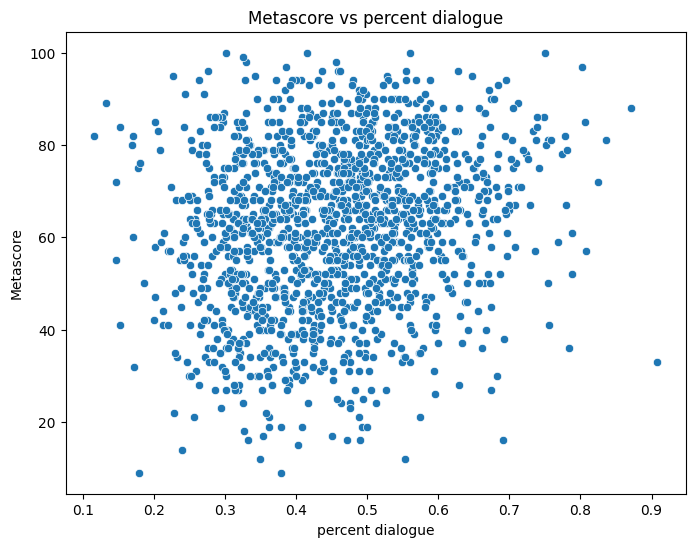

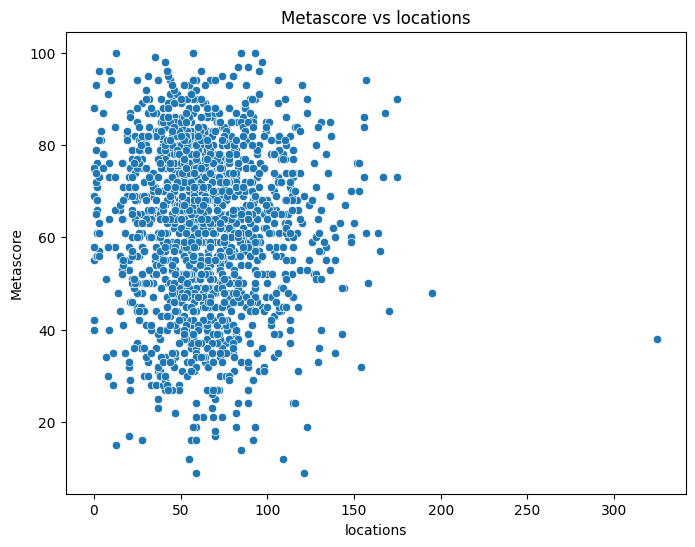

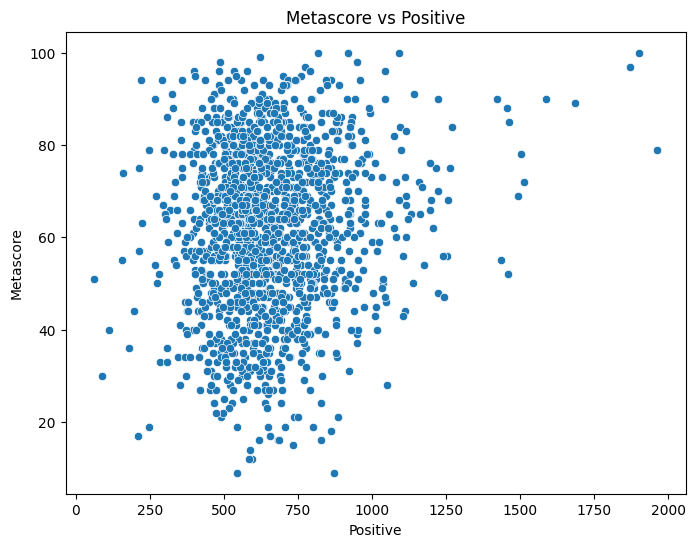

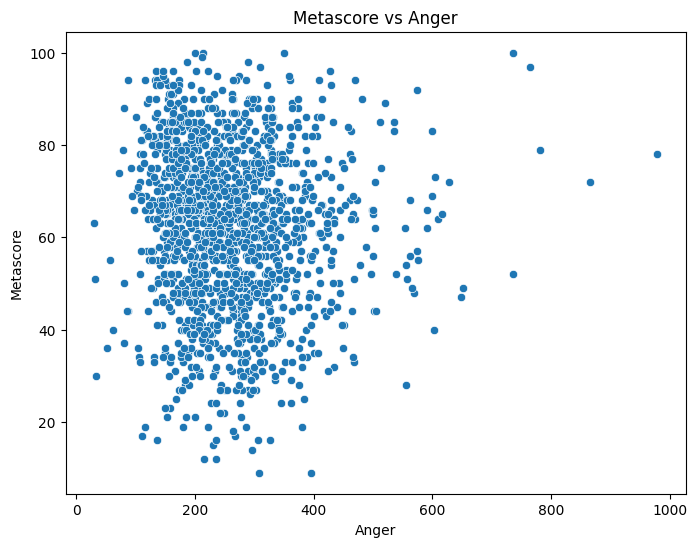

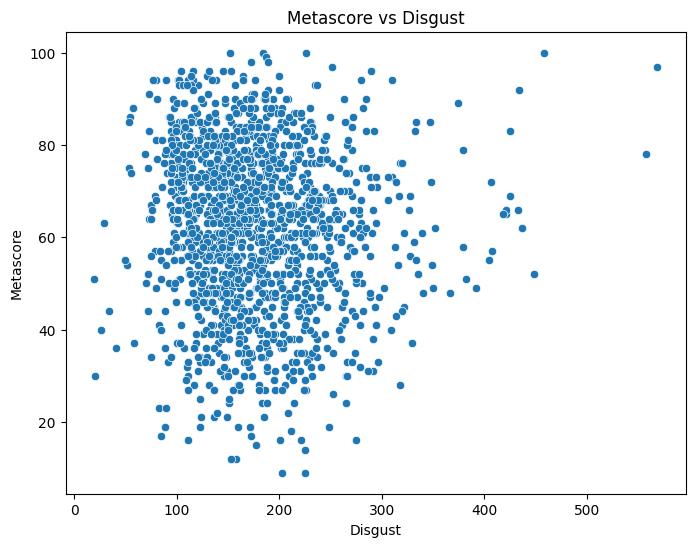

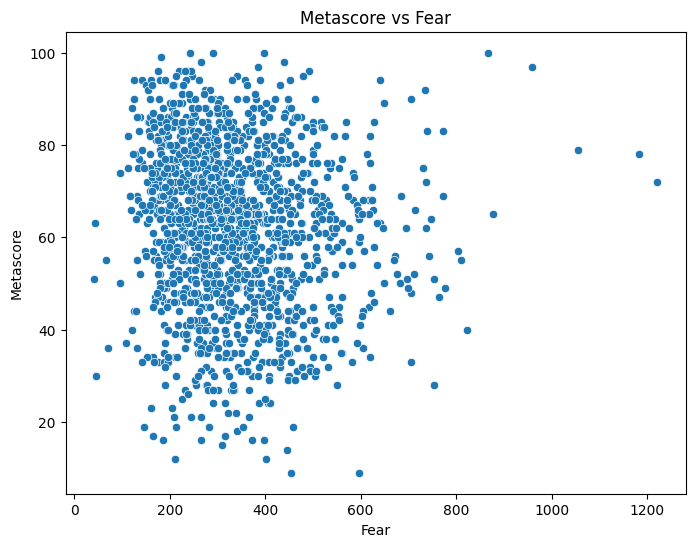

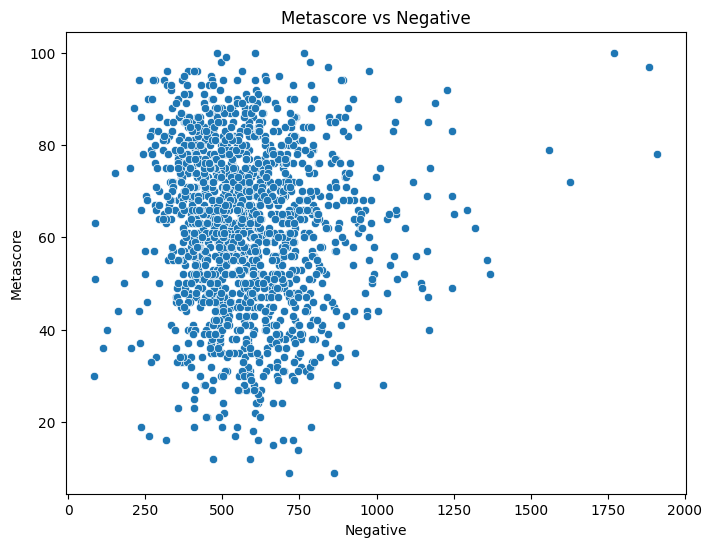

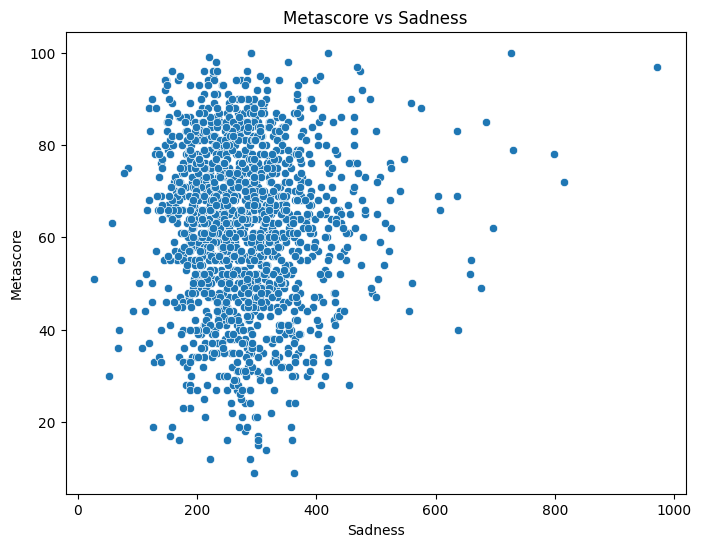

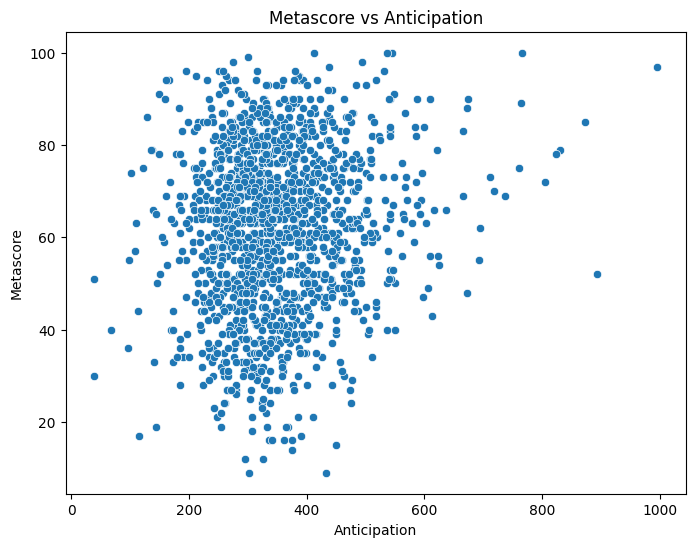

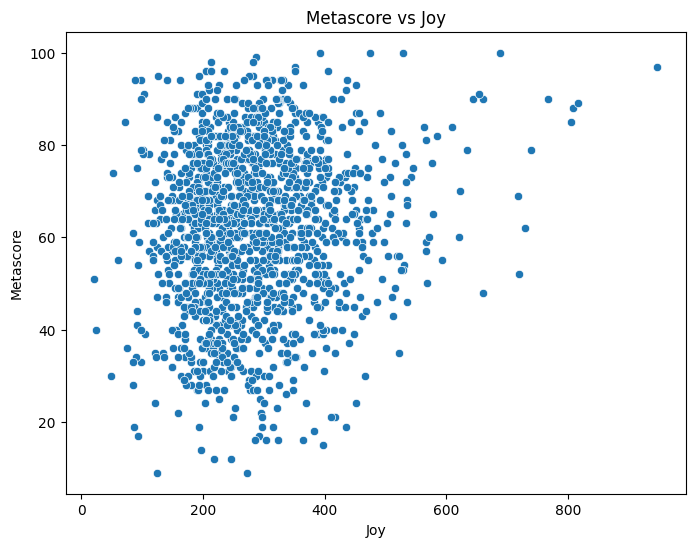

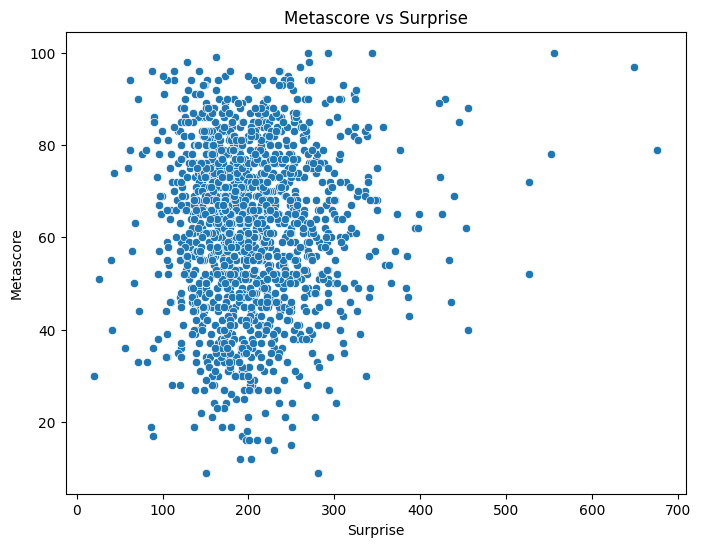

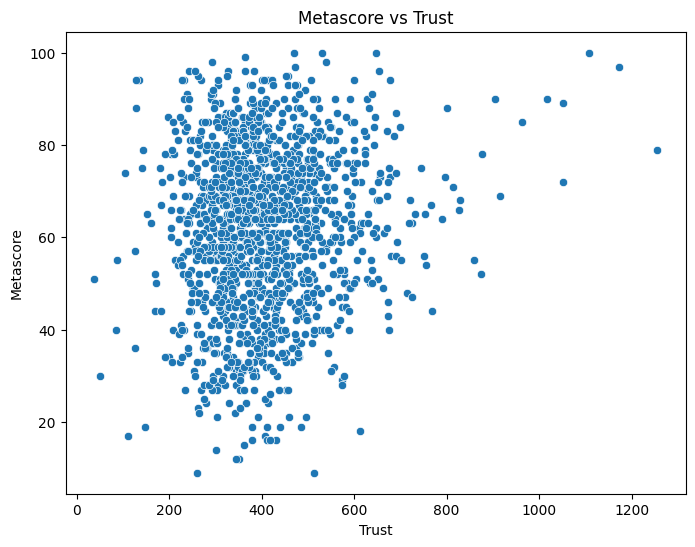

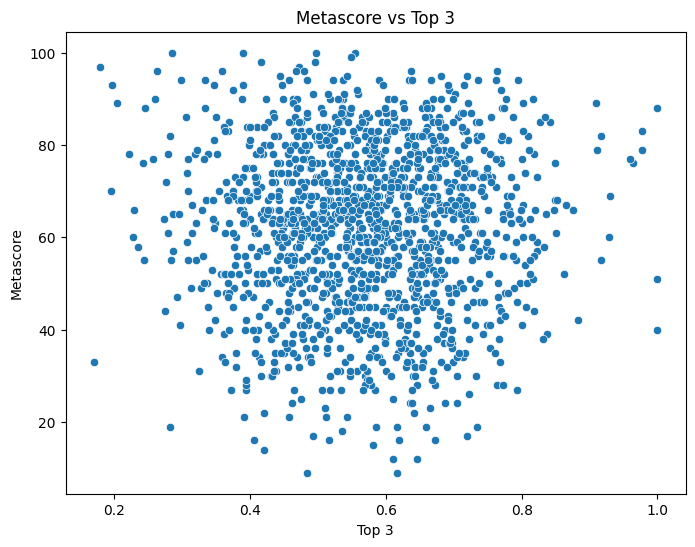

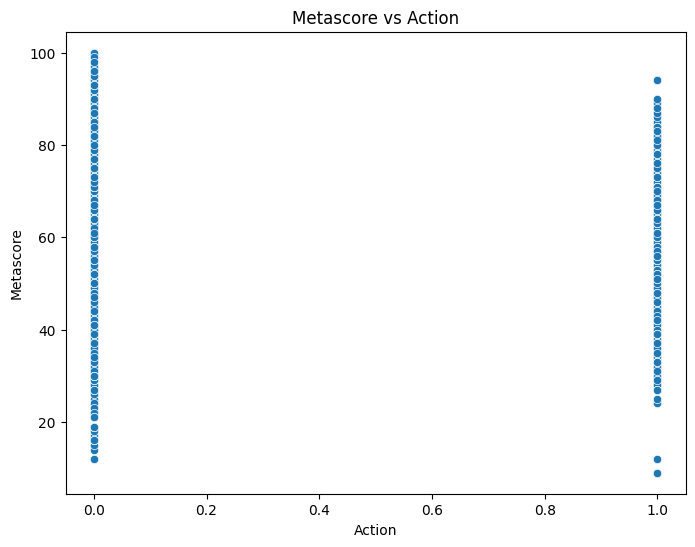

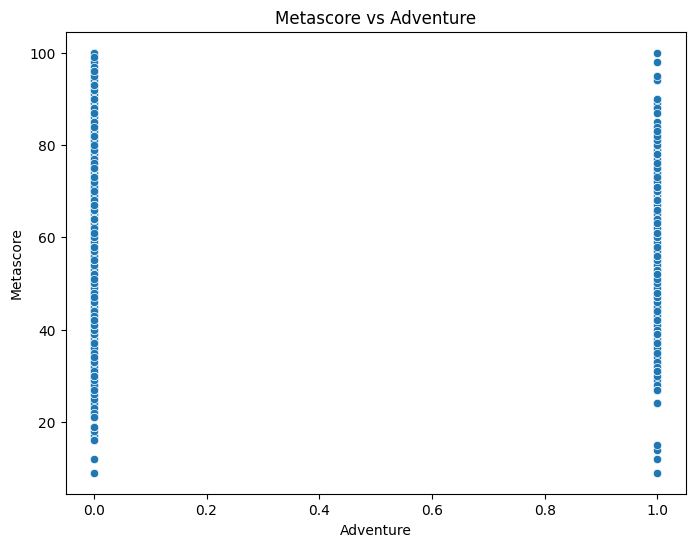

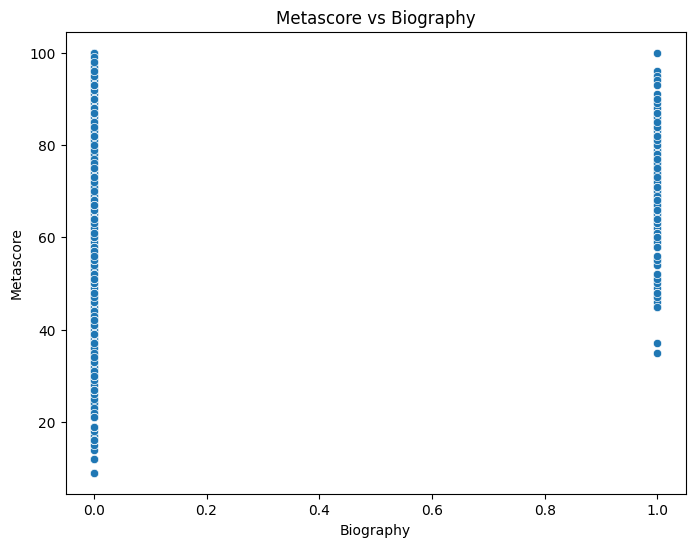

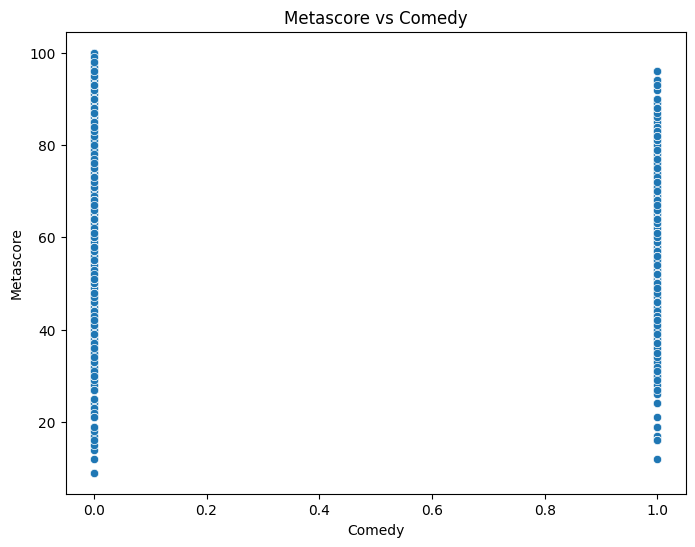

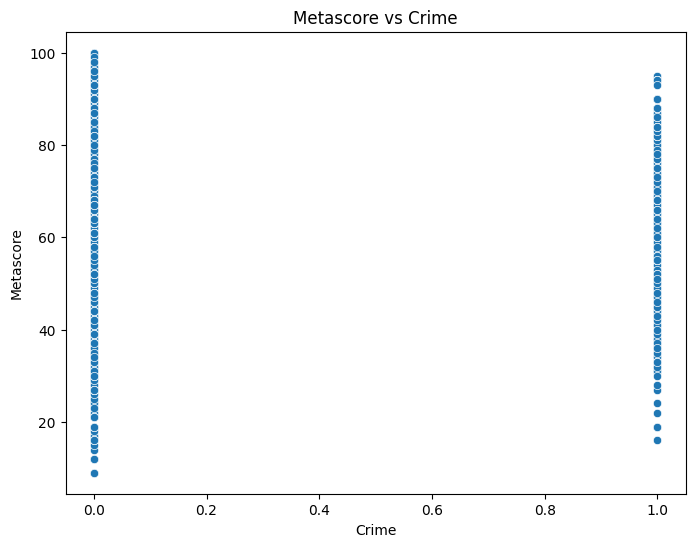

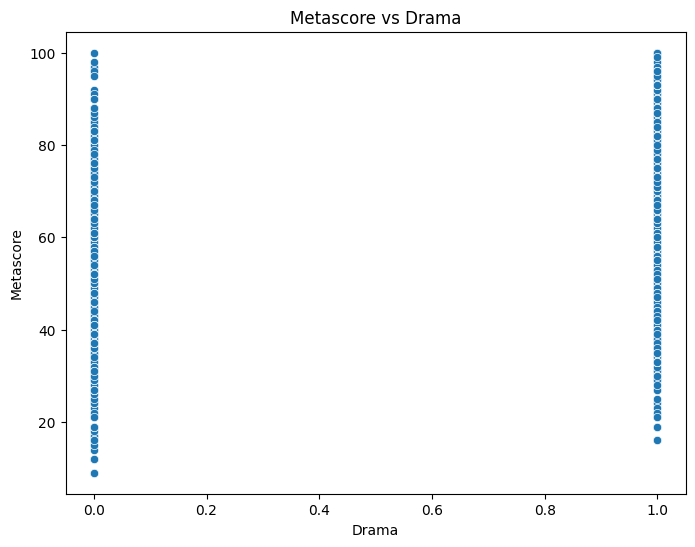

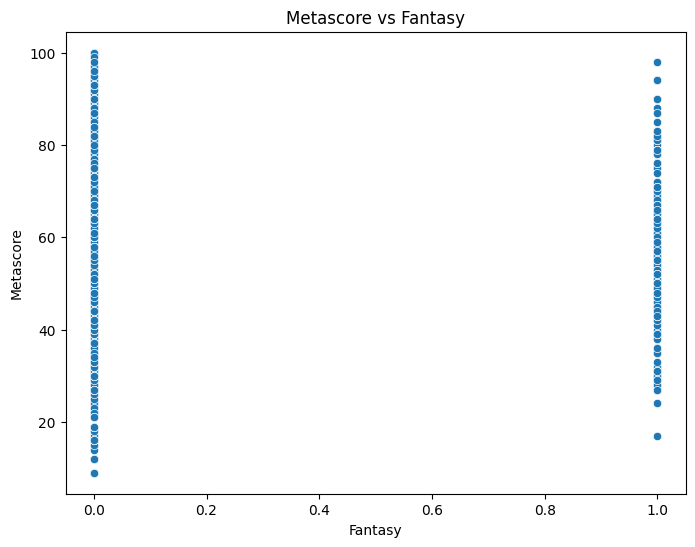

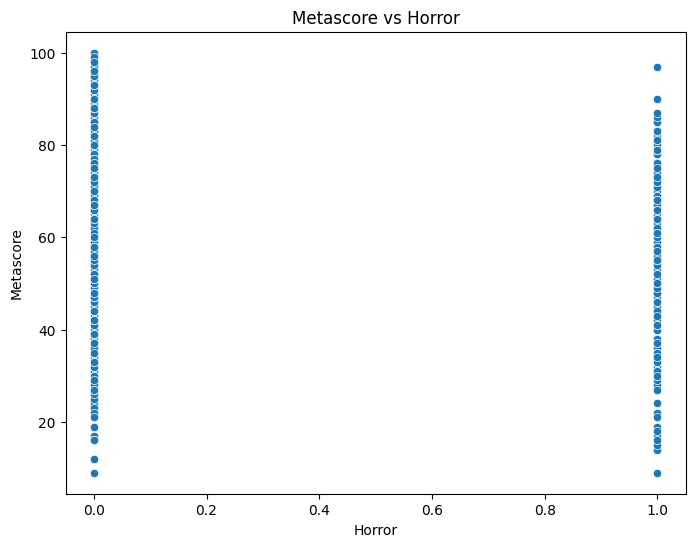

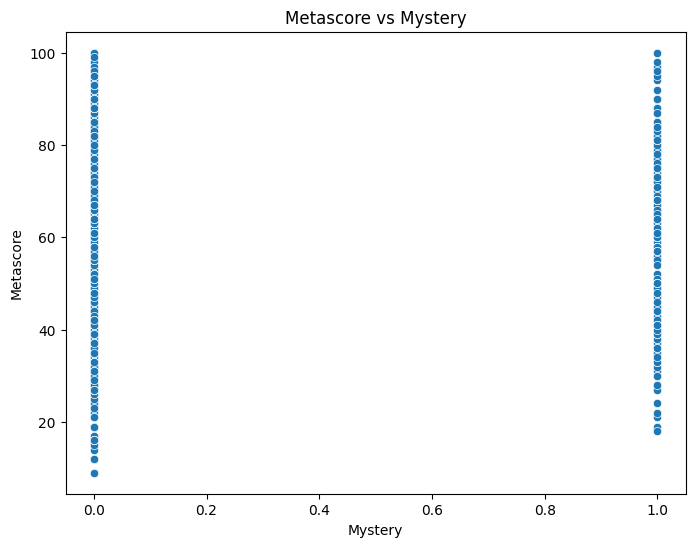

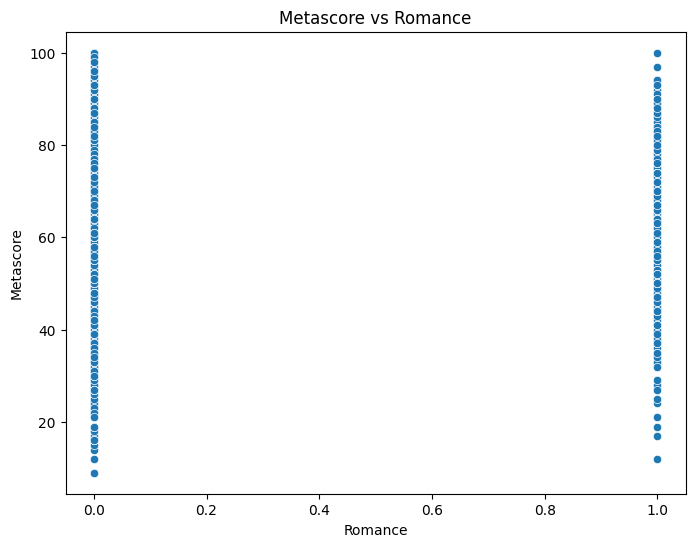

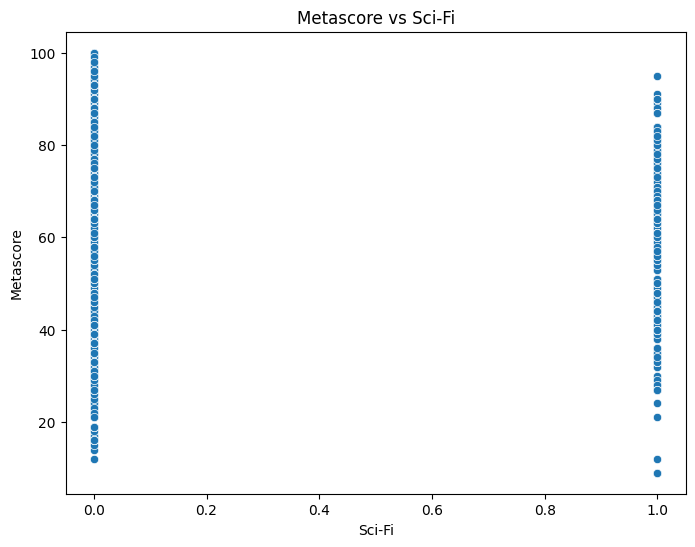

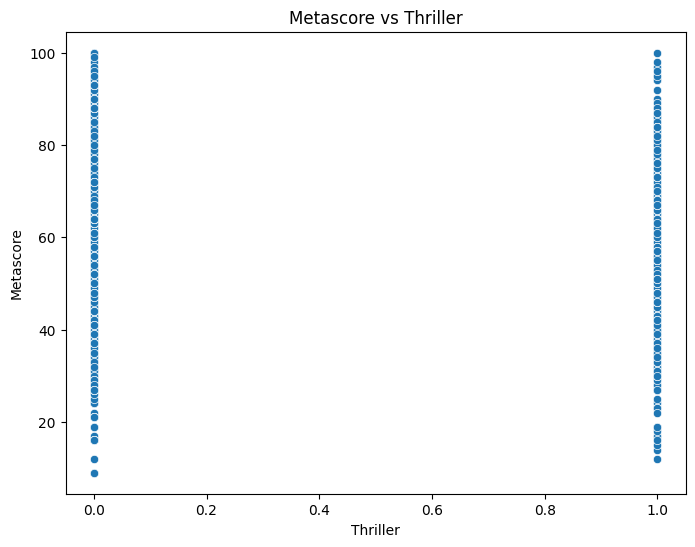

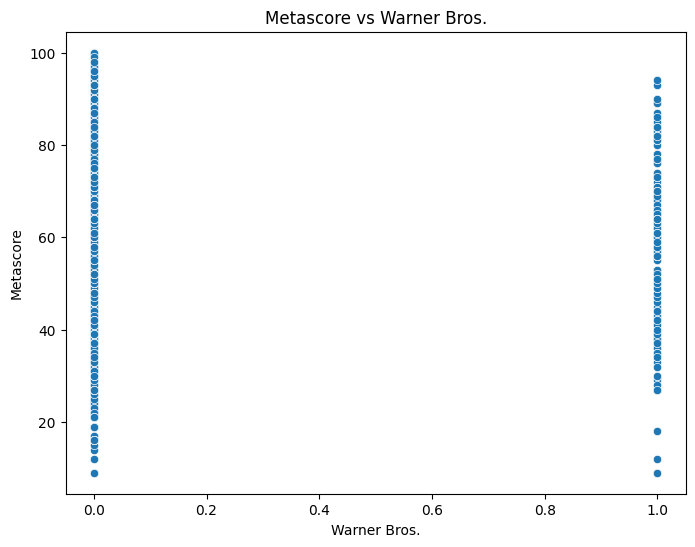

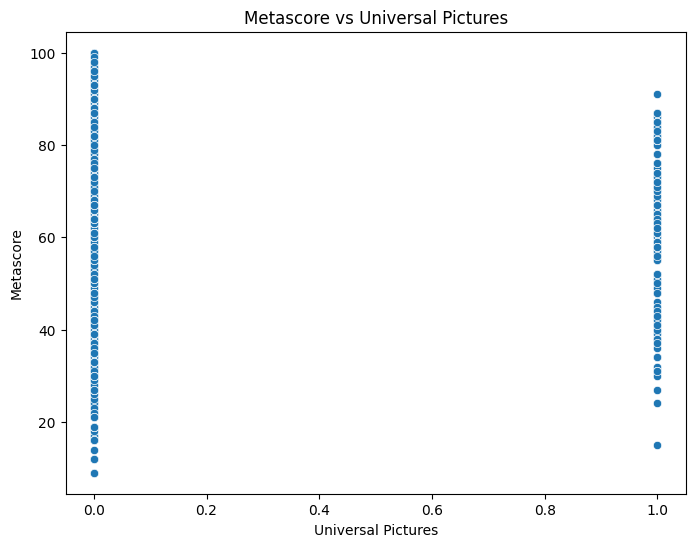

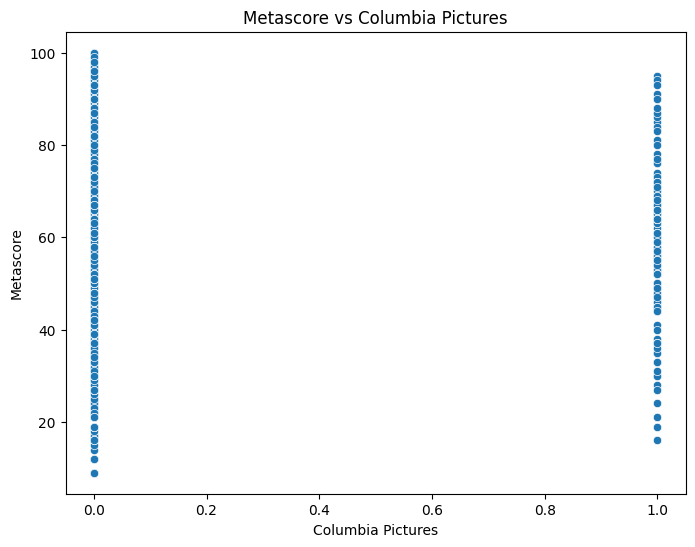

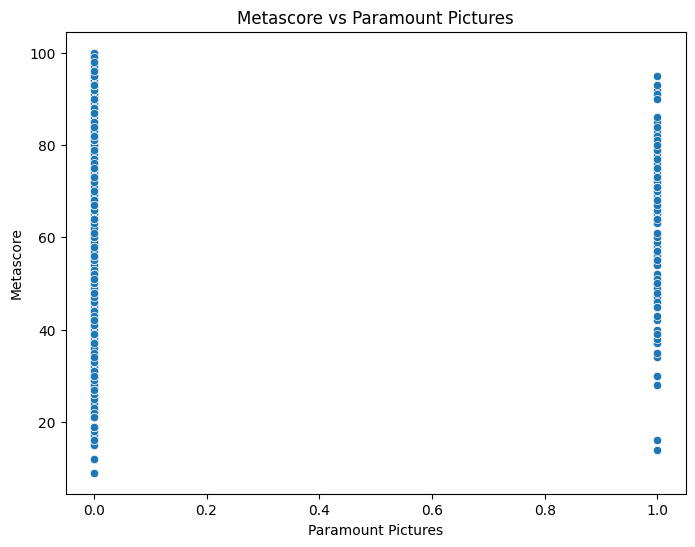

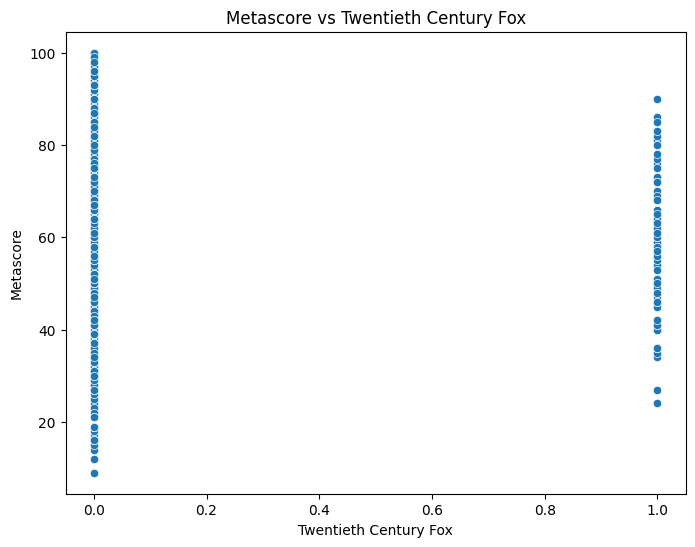

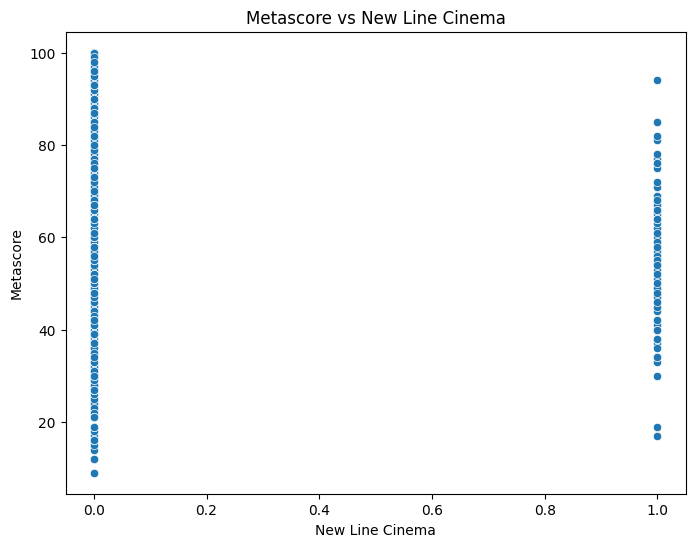

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'updated_movie_dataset.csv'
movie_data = pd.read_csv(file_path)

non_one_hot_features = movie_data.select_dtypes(include=['float64', 'int64'])
non_one_hot_features = non_one_hot_features.drop(columns=['Unnamed: 0', 'imdbid'])

# Plotting each feature against metascore
for column in non_one_hot_features.columns:
    if column != 'metascore':
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=non_one_hot_features[column], y=non_one_hot_features['metascore'])
        plt.title(f'Metascore vs {column}')
        plt.xlabel(column)
        plt.ylabel('Metascore')
        plt.show()


In [2]:

file_path = 'updated_movie_dataset.csv'
movie_data = pd.read_csv(file_path)

# feature selection
features_to_use = [
    'percent dialogue', 'Drama', 'Biography', 'characters', 'Joy', 'Trust',
    'Positive', 'Anticipation','Horror', 'Thriller', 'Action', 'Fantasy',
    'Sci-Fi', 'Adventure', 'Fear', 'Surprise', 'Anger'
]

features_to_use.append('metascore')

selected_data = movie_data[features_to_use]

print(selected_data.head())

   percent dialogue  Drama  Biography  characters    Joy  Trust  Positive  \
0          0.348611    0.0        0.0        24.0  218.0  352.0     596.0   
1          0.645387    1.0        0.0        98.0  406.0  530.0     761.0   
2          0.543055    0.0        0.0        47.0  260.0  357.0     563.0   
3          0.314321    1.0        1.0        76.0  378.0  649.0     911.0   
4          0.698996    1.0        0.0        15.0  122.0  203.0     318.0   

   Anticipation  Horror  Thriller  Action  Fantasy  Sci-Fi  Adventure   Fear  \
0         325.0     0.0       1.0     1.0      0.0     1.0        1.0  402.0   
1         443.0     0.0       0.0     0.0      0.0     0.0        0.0  291.0   
2         309.0     0.0       0.0     0.0      0.0     0.0        0.0  239.0   
3         424.0     0.0       0.0     0.0      0.0     0.0        0.0  585.0   
4         138.0     0.0       0.0     0.0      0.0     0.0        0.0  158.0   

   Surprise  Anger  metascore  
0     203.0  235.0      

In [44]:
#Linear Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

X = selected_data.drop('metascore', axis=1)  
y = selected_data['metascore']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lasso Regression - Focused alpha range around 0.1
lasso_pipeline = Pipeline([('lasso', Lasso())])
lasso_param_grid = {'lasso__alpha': np.linspace(0.01, 0.5, 50)}
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='r2')
lasso_grid_search.fit(X_train, y_train)
best_lasso_alpha = lasso_grid_search.best_params_['lasso__alpha']

# Ridge Regression - Focused alpha range around 10
ridge_pipeline = Pipeline([('ridge', Ridge())])
ridge_param_grid = {'ridge__alpha': np.logspace(0, 2, 50)}
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='r2')
ridge_grid_search.fit(X_train, y_train)
best_ridge_alpha = ridge_grid_search.best_params_['ridge__alpha']

# Select the best model
optimized_lasso = Lasso(alpha=best_lasso_alpha)
optimized_lasso.fit(X_train, y_train)
y_pred_lasso = optimized_lasso.predict(X_test)

optimized_ridge = Ridge(alpha=best_ridge_alpha)
optimized_ridge.fit(X_train, y_train)
y_pred_ridge = optimized_ridge.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Choose the model with the higher R-squared score
best_model_type = 'Lasso' if r2_lasso > r2_ridge else 'Ridge'
best_model = optimized_lasso if best_model_type == 'Lasso' else optimized_ridge
y_pred_best = y_pred_lasso if best_model_type == 'Lasso' else y_pred_ridge

mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

print(f"Lasso Model - Best Alpha: {best_lasso_alpha}")
print(f"Ridge Model - Best Alpha: {best_ridge_alpha}")
print(f"Best Model: {best_model_type}")
print(f"Best Model MSE: {mse_best}")
print(f"Best Model MAE: {mae_best}")
print(f"MAPE: {mape_best}%")
print(f"Best Model R-squared: {r2_best}")


Lasso Model - Best Alpha: 0.13
Ridge Model - Best Alpha: 39.06939937054615
Best Model: Ridge
Best Model MSE: 239.620391611426
Best Model MAE: 12.375772067921341
MAPE: 24.052304221824887%
Best Model R-squared: 0.16309735646433365


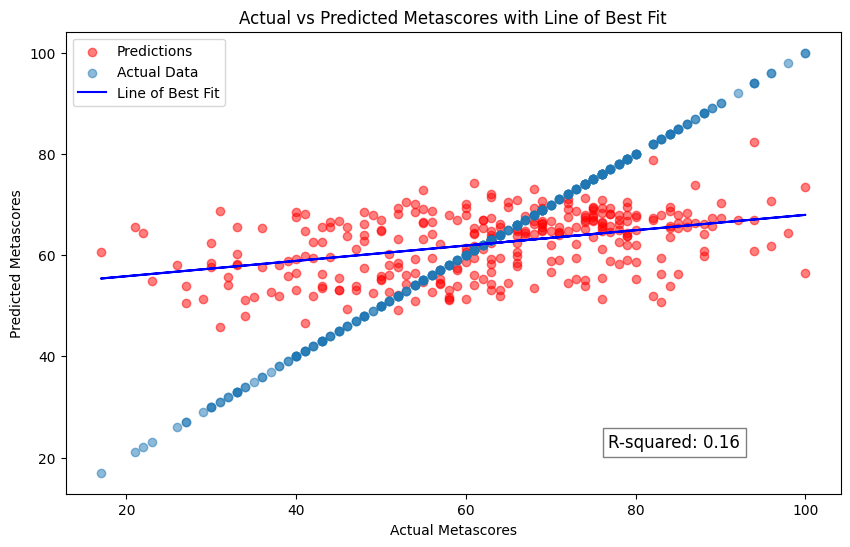

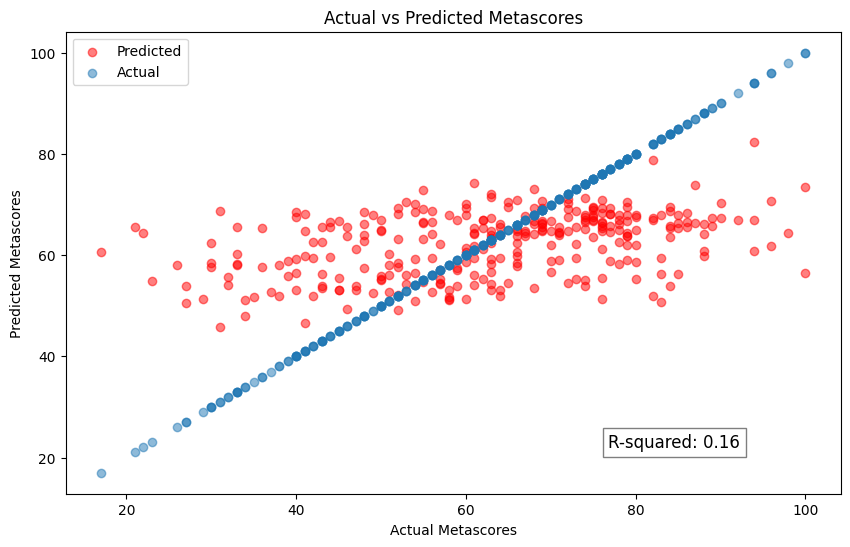

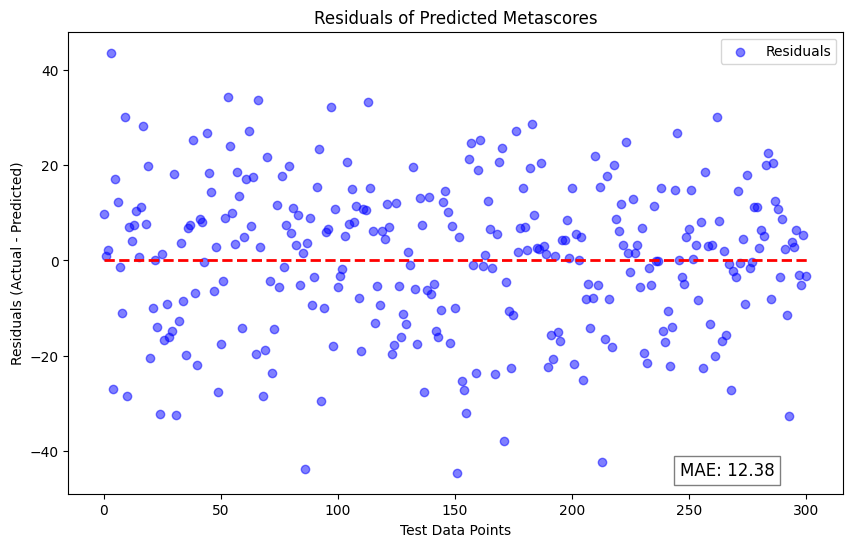

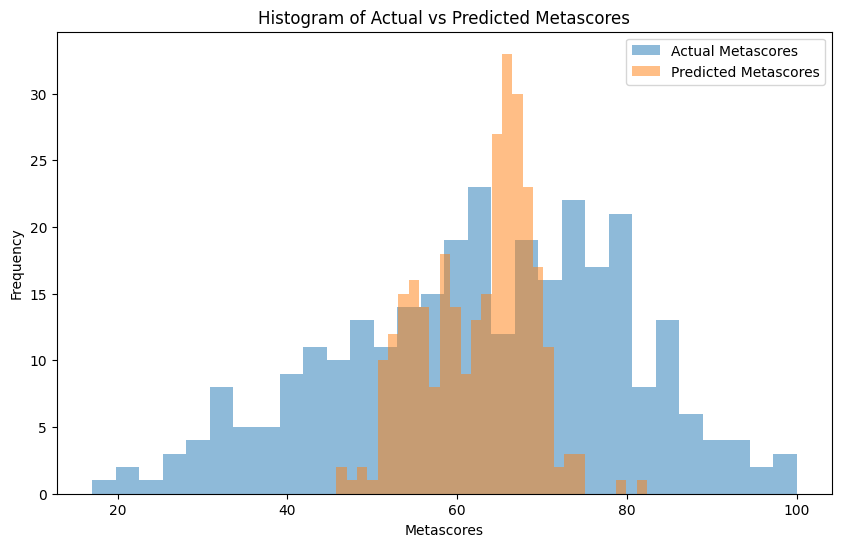

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

y_pred_line = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred_line)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_line, alpha=0.5, color='red', label='Predictions')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual Data')

m, b = np.polyfit(y_test, y_pred_line, 1)
plt.plot(y_test, m*y_test + b, color='blue', label='Line of Best Fit')

plt.title('Actual vs Predicted Metascores with Line of Best Fit')
plt.xlabel('Actual Metascores')
plt.ylabel('Predicted Metascores')

plt.legend()
plt.text(0.7, 0.1, f'R-squared: {r2:.2f}', fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5, color='red', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual')
plt.title('Actual vs Predicted Metascores')
plt.xlabel('Actual Metascores')
plt.ylabel('Predicted Metascores')
plt.legend()

plt.text(0.7, 0.1, f'R-squared: {r2:.2f}', fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


residuals = y_test - y_pred_best

x_axis_index = range(len(y_test))

plt.figure(figsize=(10, 6))
plt.scatter(x_axis_index, residuals, color='blue', alpha=0.5, label='Residuals')
plt.hlines(y=0, xmin=0, xmax=len(x_axis_index), colors='red', linestyles='--', lw=2)  # Adds a reference line at zero
plt.title('Residuals of Predicted Metascores')
plt.xlabel('Test Data Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()

plt.text(0.85, 0.05, f'MAE: {mae_best:.2f}', fontsize=12, horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Metascores')
plt.hist(y_pred_best, bins=30, alpha=0.5, label='Predicted Metascores')

plt.title('Histogram of Actual vs Predicted Metascores')
plt.xlabel('Metascores')
plt.ylabel('Frequency')
plt.legend()

plt.show()


In [35]:
#Polynomial Regression

#Ridge Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = selected_data.drop('metascore', axis=1)  
y = selected_data['metascore']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2

ridge_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ('ridge', Ridge())
])

#ridge_param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
ridge_param_grid = {'ridge__alpha': np.logspace(0, 2, 50)}

#grid search
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')

ridge_grid_search.fit(X_train, y_train)

best_ridge_alpha = ridge_grid_search.best_params_['ridge__alpha']

#optimized model
optimized_ridge = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ('ridge', Ridge(alpha=best_ridge_alpha))
])
optimized_ridge.fit(X_train, y_train)

y_pred_ridge = optimized_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Best Alpha for Ridge Regression: {best_ridge_alpha}")
print(f"Optimized Ridge Regression - MSE: {mse_ridge}")
print(f"Optimized Ridge Regression - MAE: {mae_ridge}")
print(f"Optimized Ridge Regression - R-squared: {r2_ridge}")


Best Alpha for Ridge Regression: 24.42053094548651
Optimized Ridge Regression - MSE: 270.30901560325987
Optimized Ridge Regression - MAE: 12.817231755701965
Optimized Ridge Regression - R-squared: 0.055913696624203646


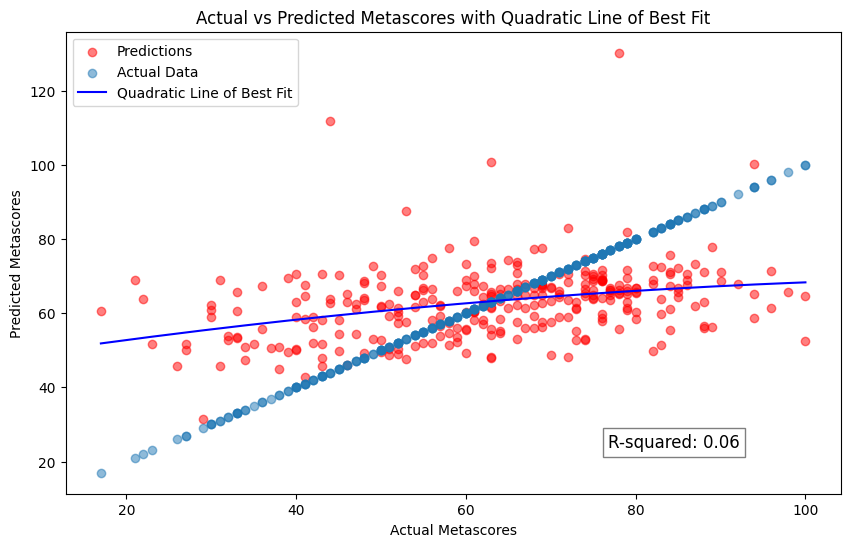

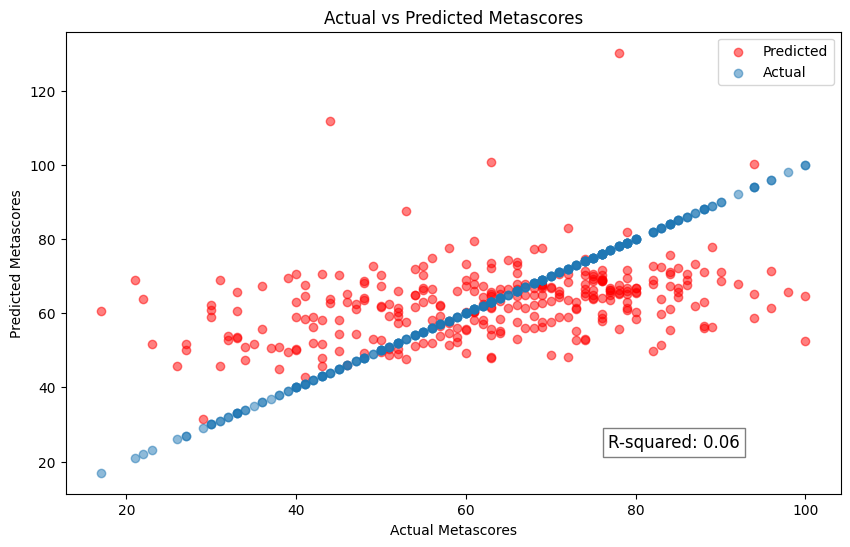

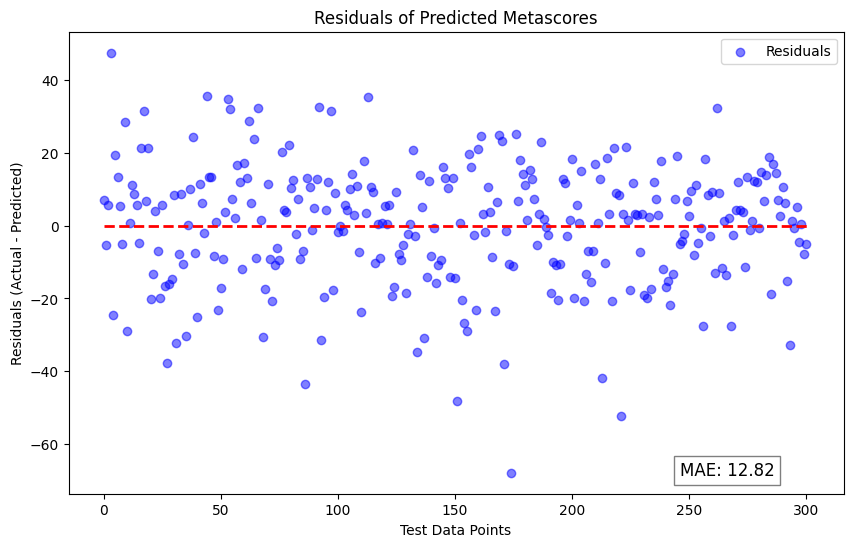

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

y_pred_ridge_line = optimized_ridge.predict(X_test)

r2_ridge_line = r2_score(y_test, y_pred_ridge_line)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge_line, alpha=0.5, color='red', label='Predictions')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual Data')

coeffs = np.polyfit(y_test, y_pred_ridge_line, 2)
quadratic_line = np.poly1d(coeffs)
y_fit = quadratic_line(np.sort(y_test))
plt.plot(np.sort(y_test), y_fit, color='blue', label='Quadratic Line of Best Fit')

plt.title('Actual vs Predicted Metascores with Quadratic Line of Best Fit')
plt.xlabel('Actual Metascores')
plt.ylabel('Predicted Metascores')

plt.legend()
plt.text(0.7, 0.1, f'R-squared: {r2_ridge_line:.2f}', fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='red', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual')
plt.title('Actual vs Predicted Metascores')
plt.xlabel('Actual Metascores')
plt.ylabel('Predicted Metascores')
plt.legend()

plt.text(0.7, 0.1, f'R-squared: {r2_ridge:.2f}', fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

residuals_ridge = y_test - y_pred_ridge

x_axis_index_ridge = range(len(y_test))

plt.figure(figsize=(10, 6))
plt.scatter(x_axis_index_ridge, residuals_ridge, color='blue', alpha=0.5, label='Residuals')
plt.hlines(y=0, xmin=0, xmax=len(x_axis_index_ridge), colors='red', linestyles='--', lw=2)  # Adds a reference line at zero
plt.title('Residuals of Predicted Metascores')
plt.xlabel('Test Data Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()

plt.text(0.85, 0.05, f'MAE: {mae_ridge:.2f}', fontsize=12, horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()



mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

In [52]:
#Polynomial Regression

#Lasso
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = selected_data.drop('metascore', axis=1)  
y = selected_data['metascore']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degree = 2

#pipeline with Polynomial Features and Lasso Regression
lasso_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ('lasso', Lasso(max_iter=10000))
])

# Define a focused range of alpha values around 100
lasso_param_grid = {'lasso__alpha': np.linspace(50, 150, 50)}

#grid search for Lasso
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')

lasso_grid_search.fit(X_train, y_train)

best_lasso_alpha = lasso_grid_search.best_params_['lasso__alpha']

# Re-run Lasso Regression with the best alpha
optimized_lasso = Pipeline([
    ('poly', PolynomialFeatures(degree)),
    ('lasso', Lasso(alpha=best_lasso_alpha, max_iter=10000))
])
optimized_lasso.fit(X_train, y_train)

y_pred_lasso = optimized_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Best Alpha for Lasso Regression: {best_lasso_alpha}")
print(f"Optimized Lasso Regression - MSE: {mse_lasso}")
print(f"Optimized Lasso Regression - MAE: {mae_lasso}")
print(f"Optimized Lasso Regression - R-squared: {r2_lasso}")







c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+05, tolerance: 3.043e+01
  model = cd_fast.enet_coordinate_descent(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+05, tolerance: 2.958e+01
  model = cd_fast.enet_coordinate_descent(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.163e+05, tolerance: 3.064e+01
  model = cd_fast.enet_

Best Alpha for Lasso Regression: 82.65306122448979
Optimized Lasso Regression - MSE: 264.5928025641796
Optimized Lasso Regression - MAE: 12.91579264578943
Optimized Lasso Regression - R-squared: 0.07587824876956961


c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.315e+05, tolerance: 3.716e+01
  model = cd_fast.enet_coordinate_descent(


MAPE: 24.779382526488003%


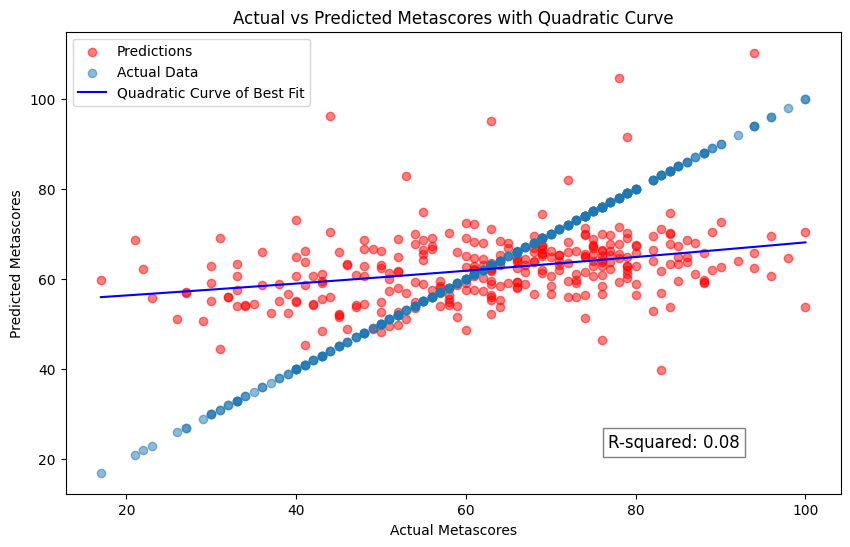

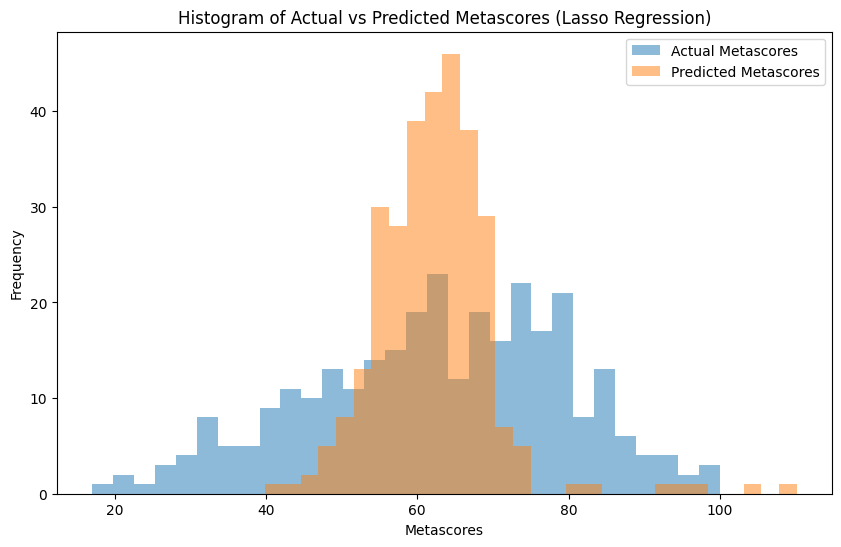

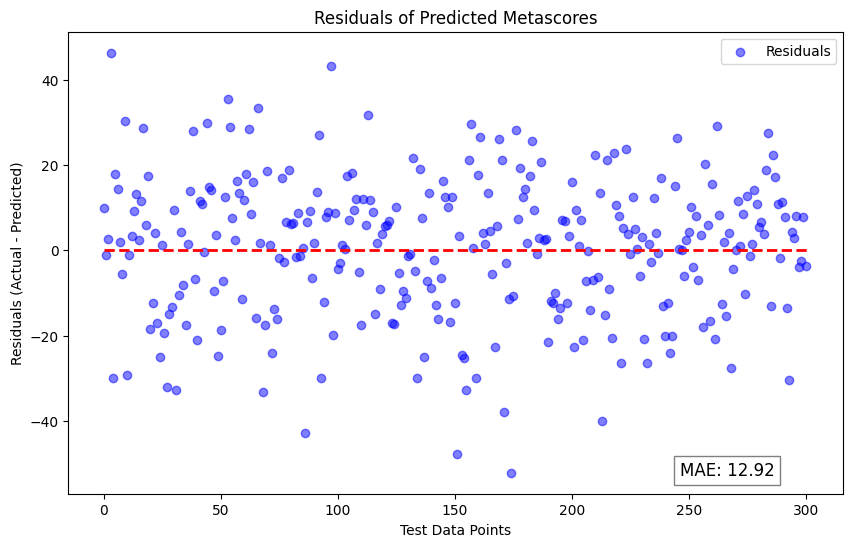

In [61]:

mape_best = np.mean(np.abs((y_test - y_pred_lasso) / y_test)) * 100
print(f"MAPE: {mape_best}%")

import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

y_pred_lasso = optimized_lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.5, color='red', label='Predictions')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual Data')

coeffs = np.polyfit(y_test, y_pred_lasso, 2)
quadratic_curve = np.poly1d(coeffs)
x_curve = np.linspace(min(y_test), max(y_test), 100)
y_curve = quadratic_curve(x_curve)
plt.plot(x_curve, y_curve, color='blue', label='Quadratic Curve of Best Fit')

plt.title('Actual vs Predicted Metascores with Quadratic Curve')
plt.xlabel('Actual Metascores')
plt.ylabel('Predicted Metascores')

plt.legend()
plt.text(0.7, 0.1, f'R-squared: {r2_lasso:.2f}', fontsize=12, transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()


plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Metascores')
plt.hist(y_pred_lasso, bins=30, alpha=0.5, label='Predicted Metascores')

plt.title('Histogram of Actual vs Predicted Metascores (Lasso Regression)')
plt.xlabel('Metascores')
plt.ylabel('Frequency')
plt.legend()

plt.show()


residuals_lasso = y_test - y_pred_lasso

x_axis_index_lasso = range(len(y_test))

plt.figure(figsize=(10, 6))
plt.scatter(x_axis_index_lasso, residuals_lasso, color='blue', alpha=0.5, label='Residuals')
plt.hlines(y=0, xmin=0, xmax=len(x_axis_index_lasso), colors='red', linestyles='--', lw=2)
plt.title('Residuals of Predicted Metascores')
plt.xlabel('Test Data Points')
plt.ylabel('Residuals (Actual - Predicted)')
plt.legend()

plt.text(0.85, 0.05, f'MAE: {mae_lasso:.2f}', fontsize=12, horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))

plt.show()

